In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [27]:
heart=pd.read_csv("/content/cardio_train.csv",delimiter=';')
heart.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  cardio
0   0  18393       2     168    62.0    110     80            1     1      0     0       1       0
1   1  20228       1     156    85.0    140     90            3     1      0     0       1       1
2   2  18857       1     165    64.0    130     70            3     1      0     0       0       1
3   3  17623       2     169    82.0    150    100            1     1      0     0       1       1
4   4  17474       1     156    56.0    100     60            1     1      0     0       0       0

In [13]:
heart.info()
heart.isnull().count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


id             70000
age            70000
gender         70000
height         70000
weight         70000
ap_hi          70000
ap_lo          70000
cholesterol    70000
gluc           70000
smoke          70000
alco           70000
active         70000
cardio         70000
dtype: int64

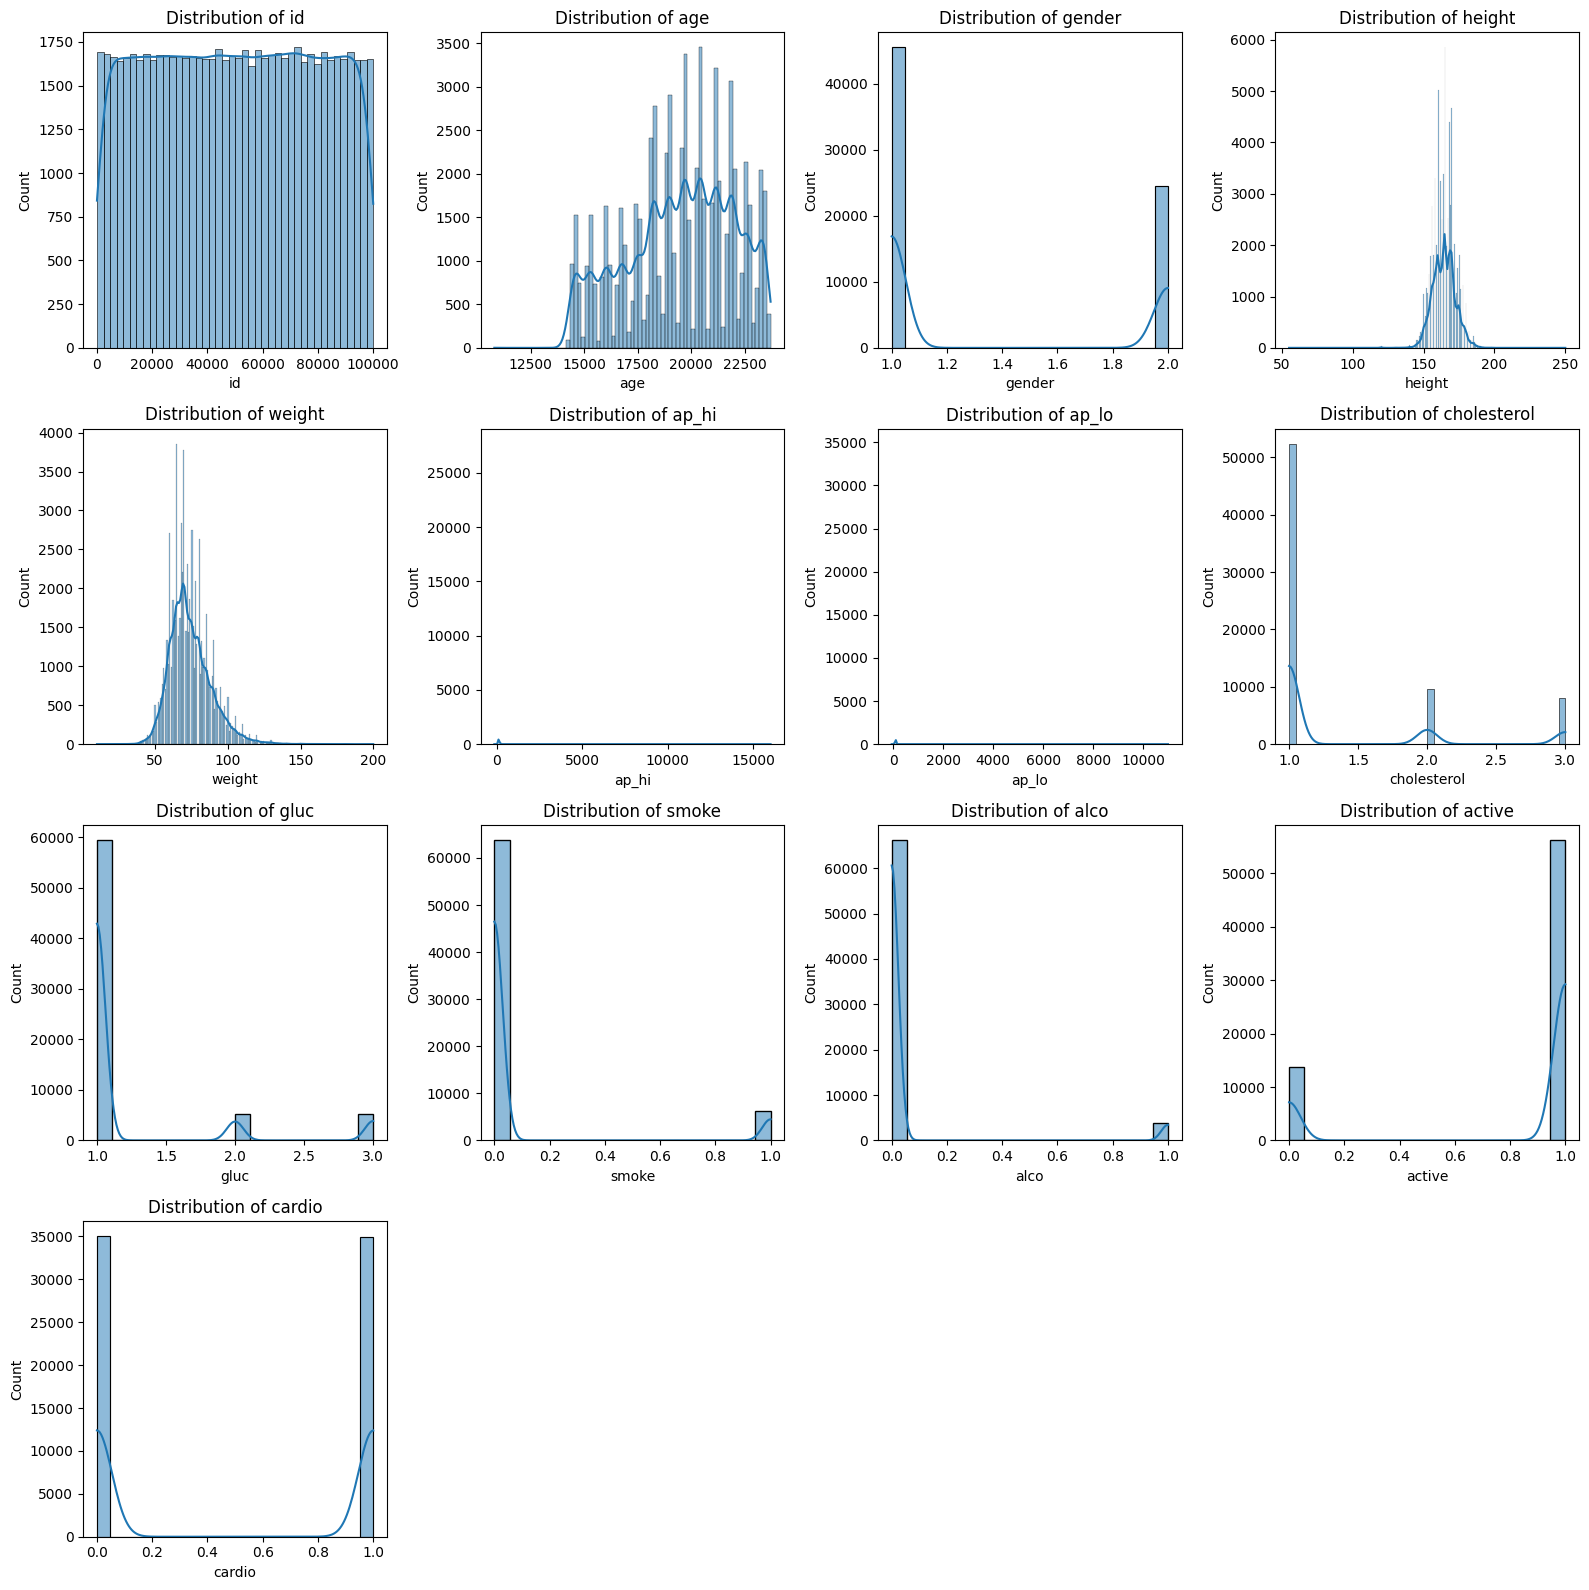

In [21]:
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
axes = axes.flatten()
for ax, col in zip(axes, heart.columns):
    sns.histplot(heart[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
for ax in axes[len(heart.columns):]:
    ax.set_visible(False)
plt.tight_layout()
plt.show()

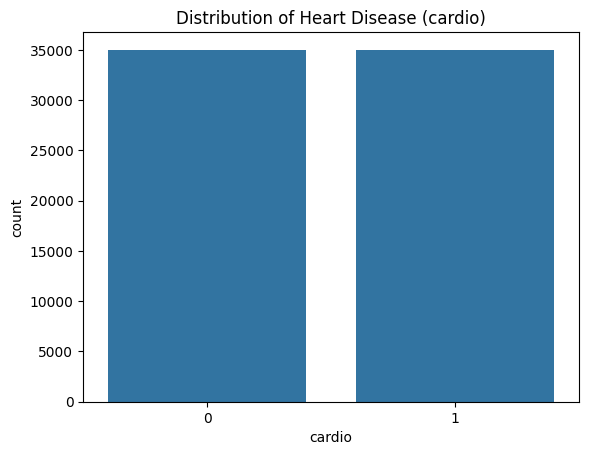

In [23]:
sns.countplot(x='cardio', data=heart)
plt.title('Distribution of Heart Disease (cardio)')
plt.show()

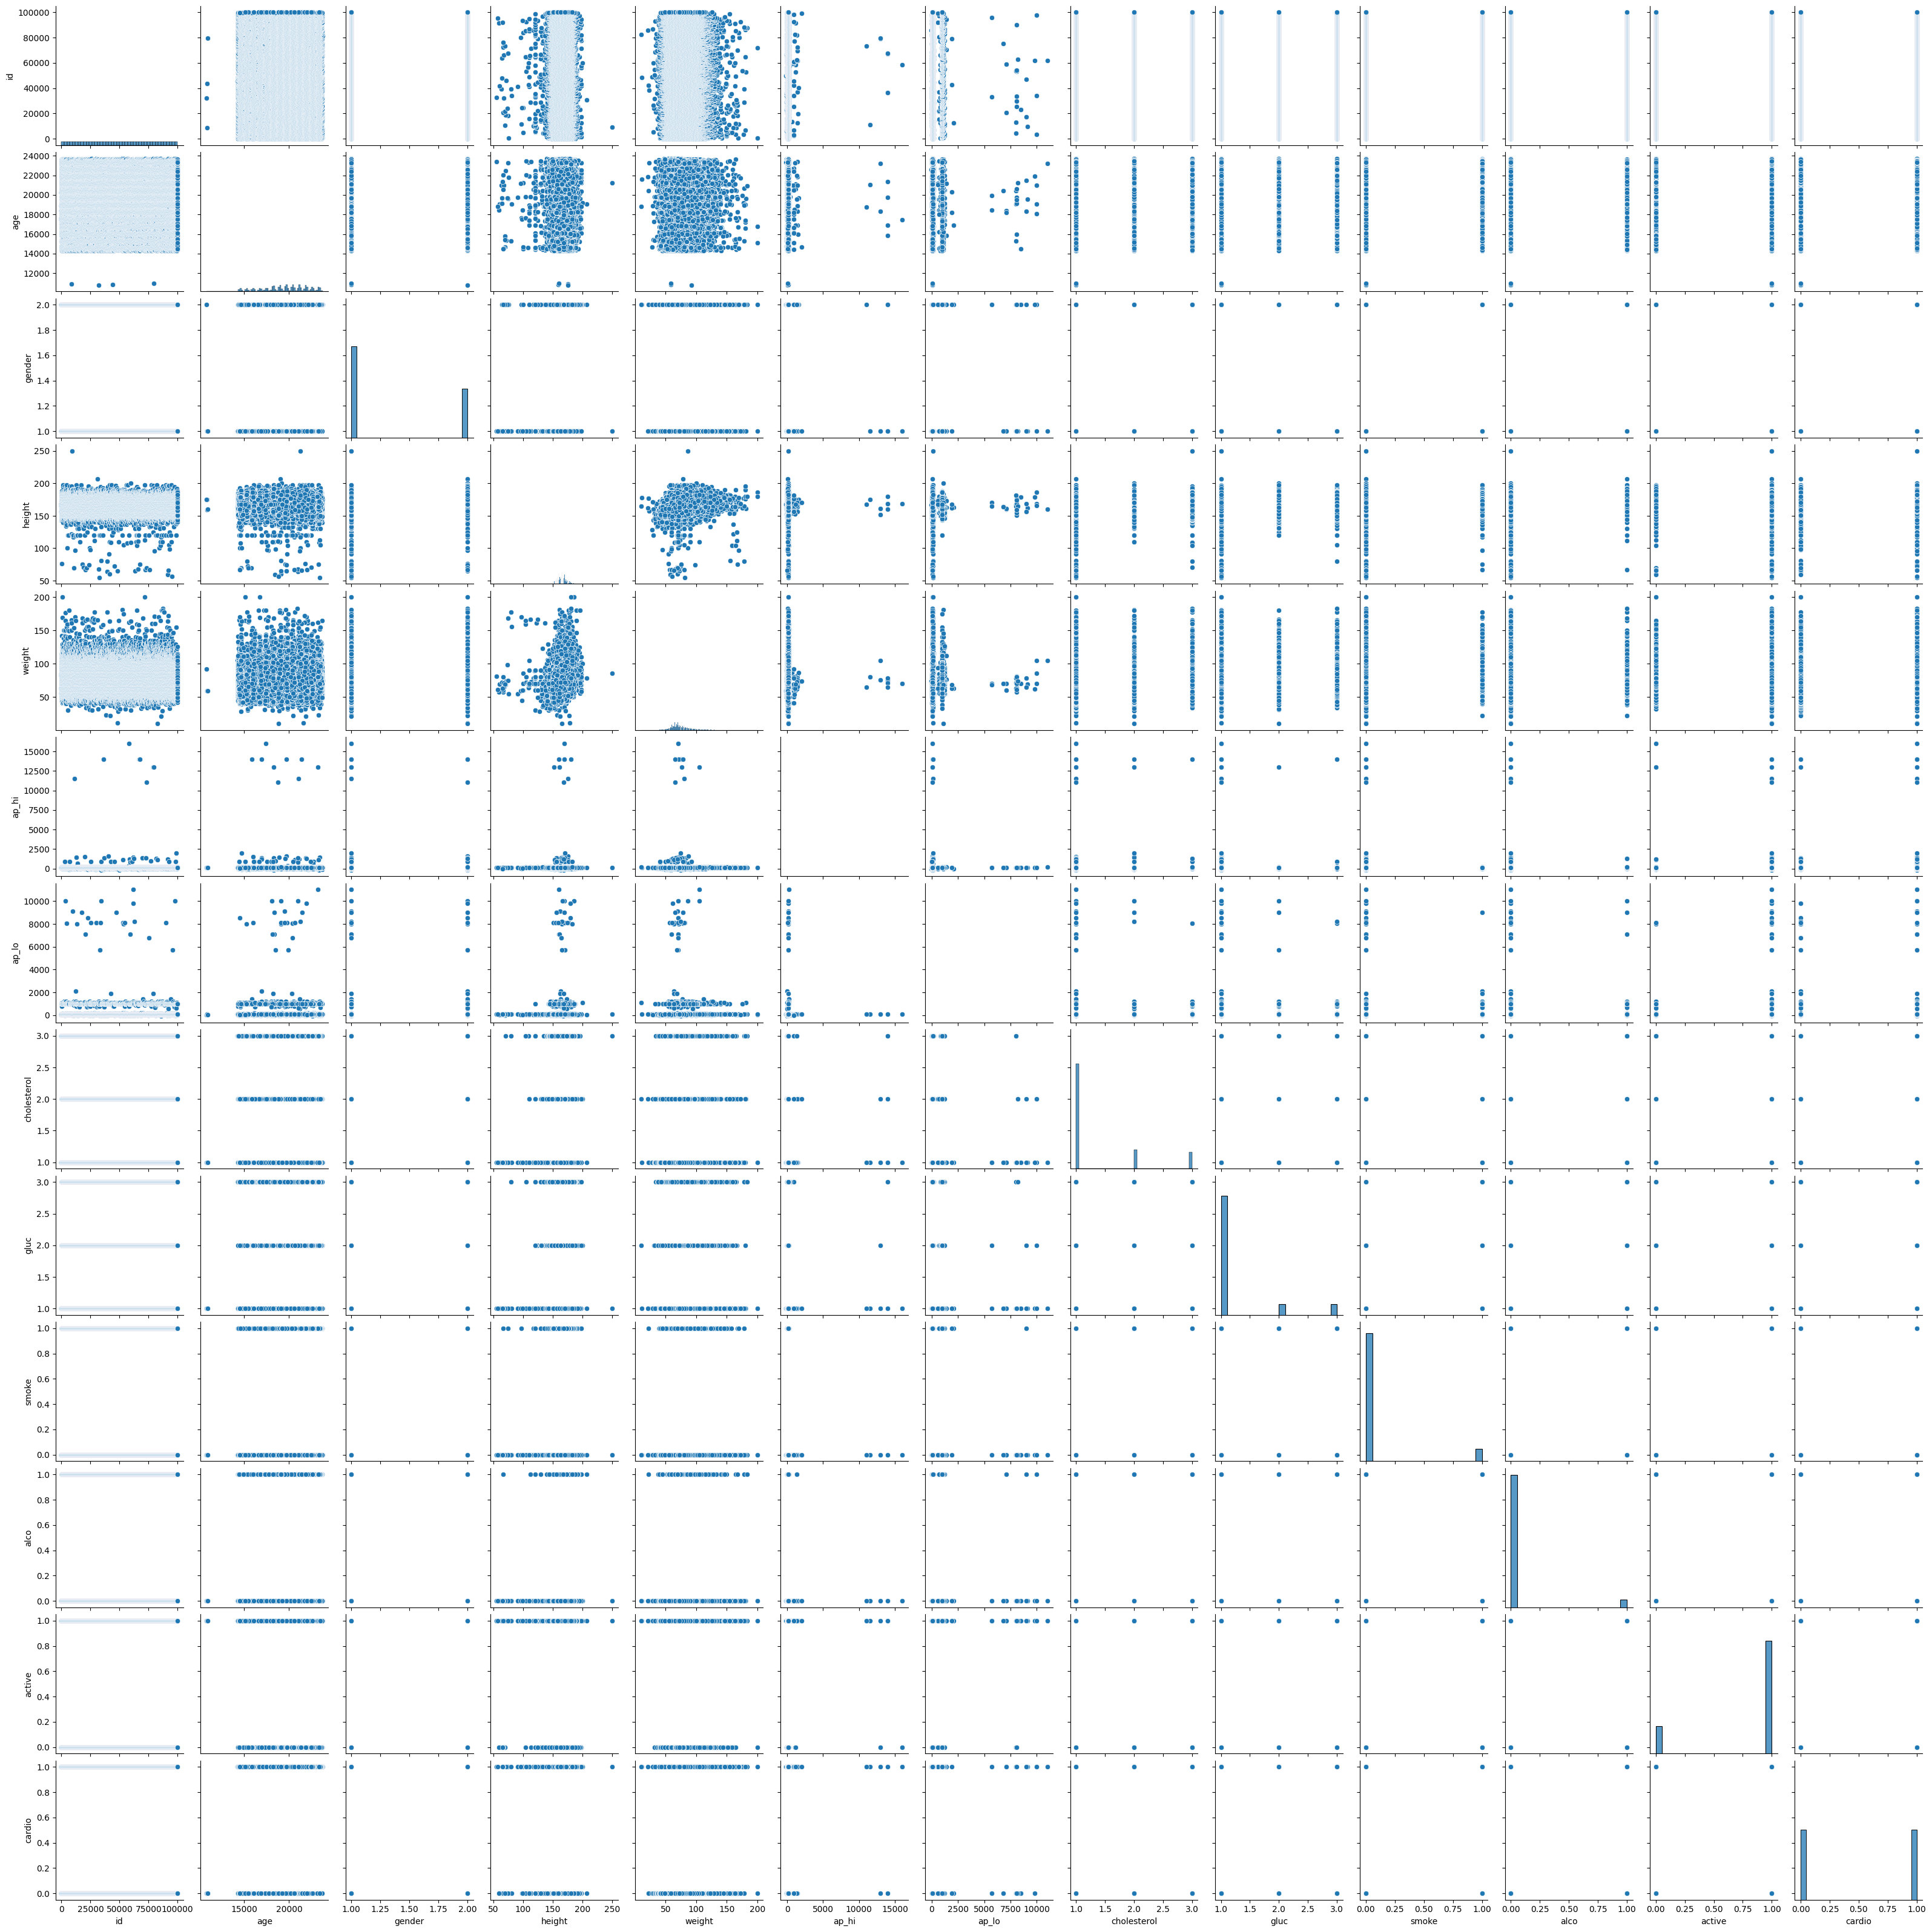

In [24]:
sns.pairplot(heart)
plt.show()

In [35]:
x=heart.drop(columns=['cardio'])
x_scale=scale.fit_transform(x)
y=heart['cardio']
xtrain,xtest,ytrain,ytest=train_test_split(x_scale,y,test_size=0.2,random_state=42)
models = {
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier()
}

results = {}
for name, model in models.items():
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    acc = accuracy_score(ytest, ypred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.2f}")

    best_model_name = max(results, key=results.get)
print("Best performing model:", best_model_name)
best_model = models[best_model_name]

SVM Accuracy: 0.73
KNN Accuracy: 0.63
Decision Tree Accuracy: 0.63
Logistic Regression Accuracy: 0.72
Random Forest Accuracy: 0.72
Best performing model: SVM
